Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

Take a look at the `SleepStudy` data within the `Lock5Data` package. The goal in this exercise will be to create a model to predict student GPAs. As an exploratory data analysis tool create a pairwise scatterplot (page 23 of lecture 9) to see whether there are any patterns visible between the following variables: 

- GPA 
- Gender 
- ClassYear 
- CognitionZscore 
- DepressionScore 
- AnxietyScore 
- StressScore 
- Drinks 
- WeekdaySleep 
- WeekendRise

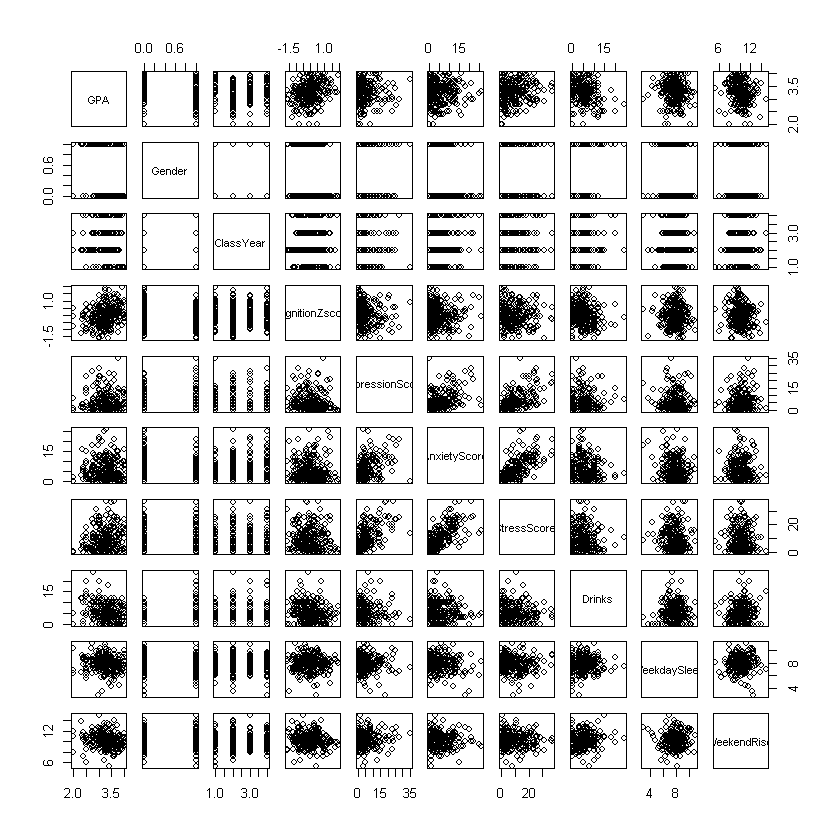

In [1]:
library(Lock5Data)
data("SleepStudy")
# YOUR CODE HERE
pairs(~ GPA + Gender + ClassYear+ CognitionZscore + DepressionScore + AnxietyScore + StressScore
      + Drinks + WeekdaySleep + WeekendRise, data=SleepStudy)
#stop("Not Implemented")

Next, create a plot to compare the effects of treating the `ClassYear` variable as a continuous or a categorical predictor of `GPA`. Hint: You will need to complete at least one very basic linear model to create the lines necessary in the plot. Be sure to include a title, clear labels, and context information!

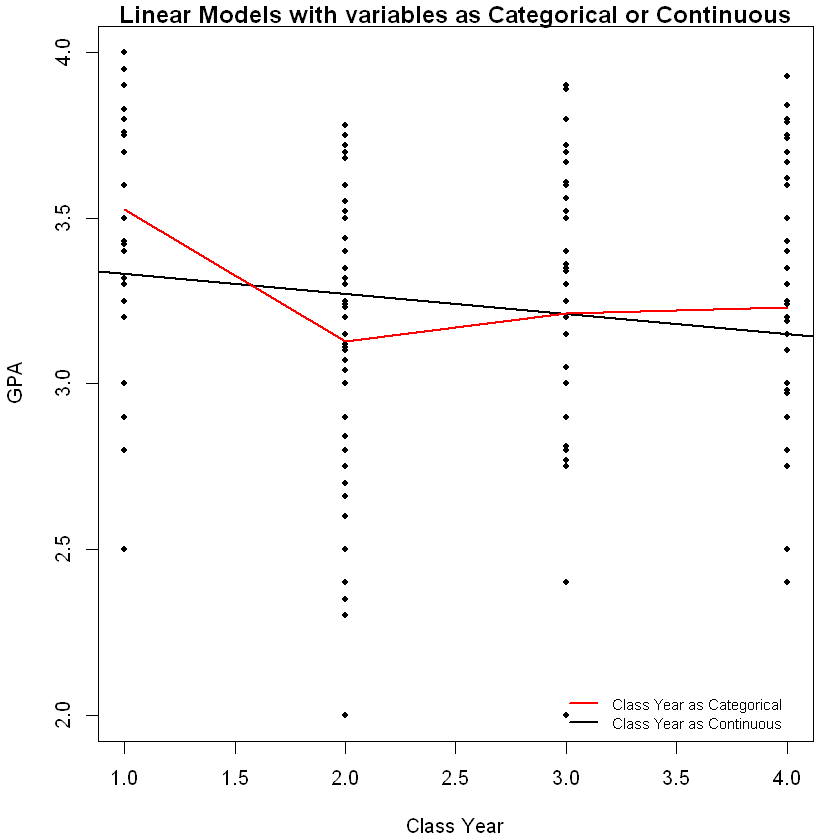

In [2]:
# YOUR CODE HERE


SleepStudy$ClassYear.fac <- as.factor(SleepStudy$ClassYear)

par(mar=c(4,4,1,1)+0.1)
plot(SleepStudy$ClassYear, SleepStudy$GPA , main = "Linear Models with variables as Categorical or Continuous", xlab = "Class Year", ylab = "GPA", pch=20)

mod.fac <- lm(SleepStudy$GPA~SleepStudy$ClassYear.fac, data=SleepStudy)

mod.num <- lm(SleepStudy$GPA~SleepStudy$ClassYear, data=SleepStudy)

fac_lines <- aggregate(mod.fac$fitted.values ~ SleepStudy$ClassYear, FUN = mean)

abline(mod.num$coefficients, col = "black", lw = 2)
lines(fac_lines, col = "red", lw = 2)

legend("bottomright", c("Class Year as Categorical", "Class Year as Continuous"), 
       col=c("red", "black"), lw = 2 , bty="n", cex = 0.75)

#stop("Not Implemented")

Following the steps used in the lecture, fit a model to predict a student's GPA. Include any intermediate steps in R that you take, explained with short comments in your code. Exploring interaction terms is encouraged, but not required.

In [3]:
# YOUR CODE HERE
attach(SleepStudy)

#Fit a model without any interactions
GPAmod <- lm(formula = GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + AnxietyScore
                + StressScore + Drinks + WeekdaySleep + WeekdayRise, data = SleepStudy)
summary(GPAmod)

# Start backwards selection: remove WeekdaySleep because least significant
GPAmod.2 <- lm(formula = GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + AnxietyScore
               + StressScore + Drinks + WeekdayRise, data = SleepStudy)
summary(GPAmod.2)

#Remove Gender
GPAmod.3 <- lm(formula = GPA ~ClassYear + CognitionZscore + DepressionScore + AnxietyScore
               + StressScore + Drinks + WeekdayRise, data = SleepStudy)
summary(GPAmod.3)

#remove WeekdayRise
GPAmod.4 <- lm(formula = GPA ~ClassYear + CognitionZscore + DepressionScore + AnxietyScore
               + StressScore + Drinks, data = SleepStudy)
summary(GPAmod.4)

#Looks like ClassYear, CognitionZScore, DepressionScore, AnxietyScore, StressScore, Drinks
#stop("Not Implemented")


Call:
lm(formula = GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise, 
    data = SleepStudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21472 -0.18645  0.03179  0.23478  0.82439 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.863744   0.235814  16.385  < 2e-16 ***
Gender          -0.078908   0.053038  -1.488 0.138107    
ClassYear       -0.073987   0.022056  -3.354 0.000922 ***
CognitionZscore  0.126061   0.032945   3.826 0.000165 ***
DepressionScore -0.009725   0.004932  -1.972 0.049749 *  
AnxietyScore    -0.017434   0.006226  -2.800 0.005519 ** 
StressScore      0.021755   0.004650   4.678 4.81e-06 ***
Drinks          -0.014242   0.006080  -2.343 0.019961 *  
WeekdaySleep    -0.019933   0.021906  -0.910 0.363751    
WeekdayRise     -0.026832   0.027874  -0.963 0.336687    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 


Call:
lm(formula = GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdayRise, data = SleepStudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25192 -0.19037  0.01851  0.24229  0.85792 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.796102   0.223712  16.969  < 2e-16 ***
Gender          -0.070957   0.052294  -1.357 0.176073    
ClassYear       -0.073341   0.022037  -3.328 0.001010 ** 
CognitionZscore  0.126528   0.032929   3.842 0.000155 ***
DepressionScore -0.009805   0.004929  -1.989 0.047780 *  
AnxietyScore    -0.016303   0.006099  -2.673 0.008020 ** 
StressScore      0.021396   0.004632   4.619 6.24e-06 ***
Drinks          -0.014260   0.006078  -2.346 0.019763 *  
WeekdayRise     -0.038027   0.025003  -1.521 0.129584    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3567 on 244 degrees of freedom
Multiple R-square


Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdayRise, data = SleepStudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22736 -0.18243  0.01289  0.24390  0.83974 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.795750   0.224095  16.938  < 2e-16 ***
ClassYear       -0.071185   0.022017  -3.233  0.00139 ** 
CognitionZscore  0.134017   0.032519   4.121 5.16e-05 ***
DepressionScore -0.010869   0.004875  -2.230  0.02667 *  
AnxietyScore    -0.015932   0.006103  -2.611  0.00960 ** 
StressScore      0.022336   0.004588   4.869 2.01e-06 ***
Drinks          -0.017144   0.005704  -3.006  0.00292 ** 
WeekdayRise     -0.040694   0.024969  -1.630  0.10443    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3574 on 245 degrees of freedom
Multiple R-squared:  0.2404,	Adjusted R-squared:  0.2187 
F-statistic: 11.07 on 7 an


Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks, data = SleepStudy)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24820 -0.18604  0.01701  0.24747  0.80941 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.449098   0.070799  48.717  < 2e-16 ***
ClassYear       -0.071393   0.022091  -3.232  0.00140 ** 
CognitionZscore  0.139015   0.032483   4.280 2.68e-05 ***
DepressionScore -0.011395   0.004880  -2.335  0.02035 *  
AnxietyScore    -0.016840   0.006098  -2.762  0.00619 ** 
StressScore      0.023804   0.004513   5.274 2.92e-07 ***
Drinks          -0.018670   0.005645  -3.307  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3586 on 246 degrees of freedom
Multiple R-squared:  0.2321,	Adjusted R-squared:  0.2134 
F-statistic: 12.39 on 6 and 246 DF,  p-value: 3.423e-12


Make a plot of the four residual analysis plots to make sure the regression does not violate any assumptions in a major way.

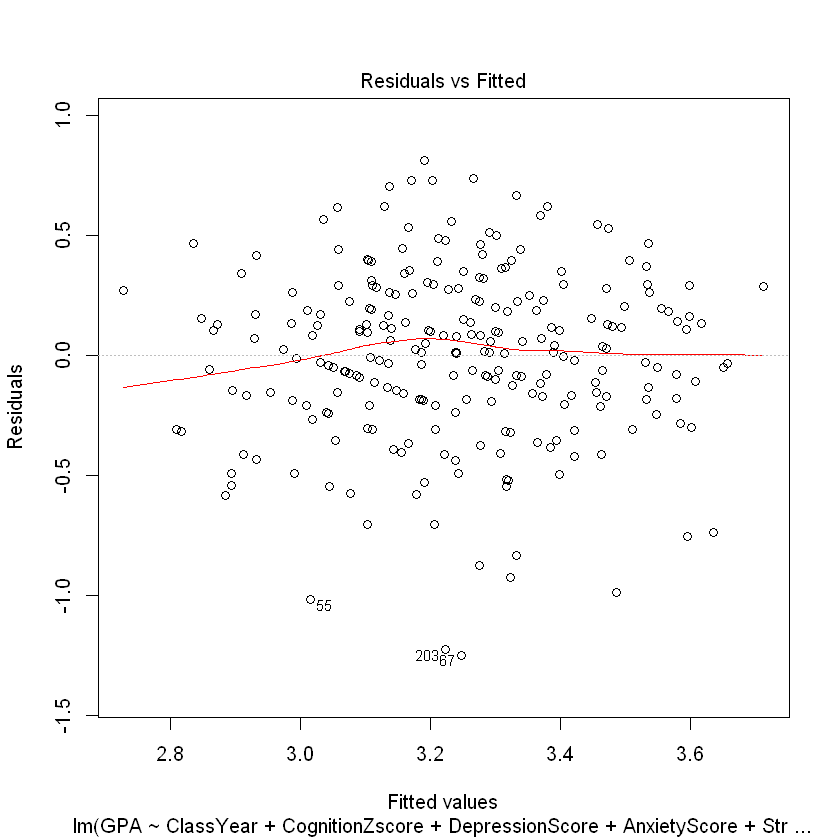

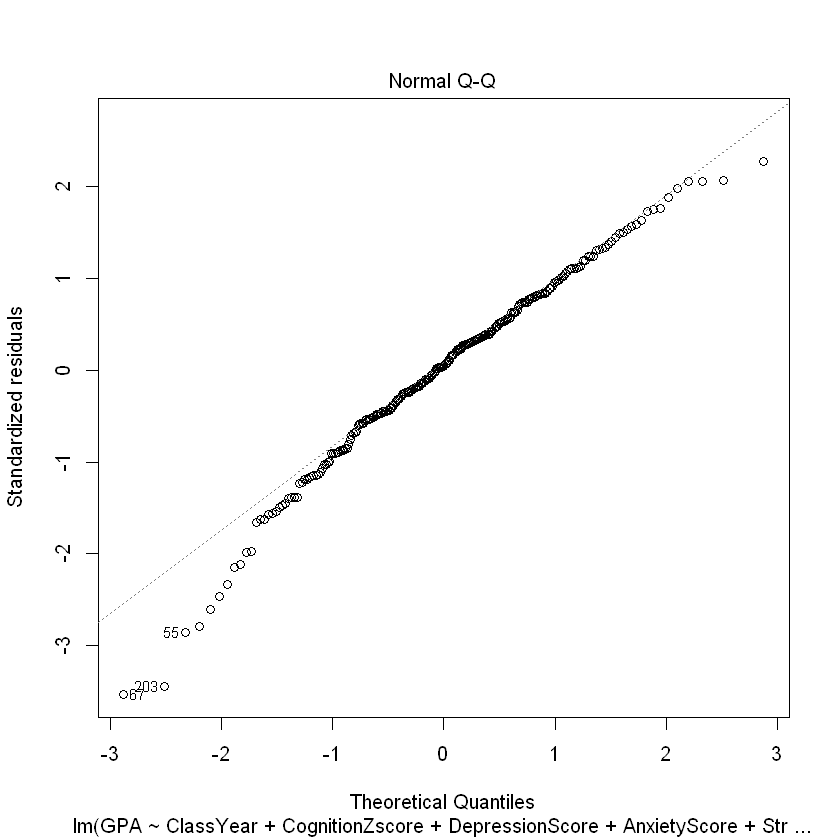

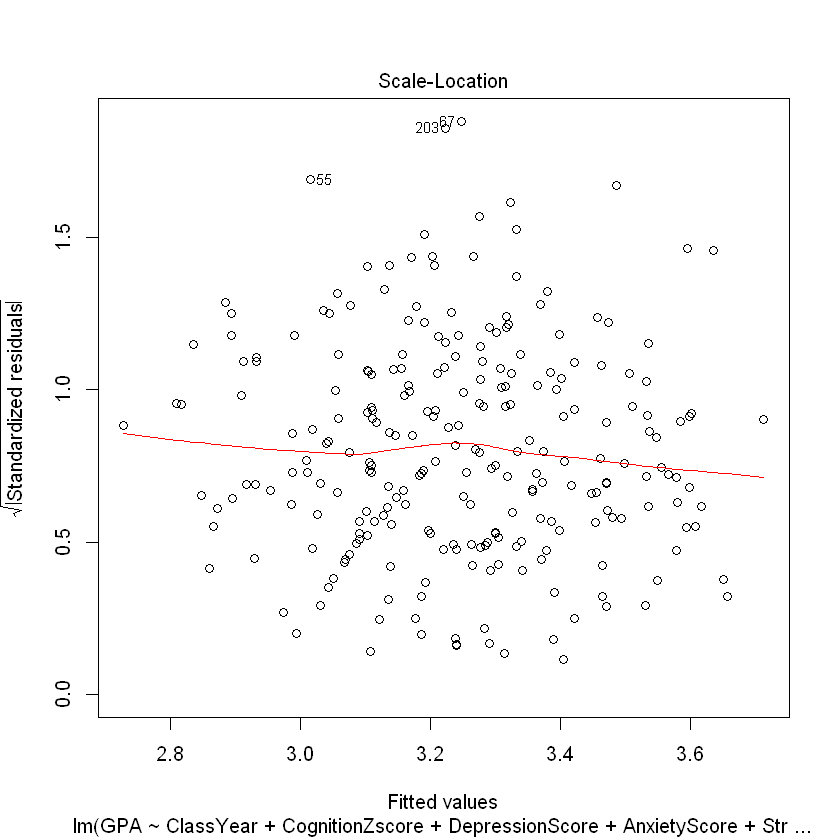

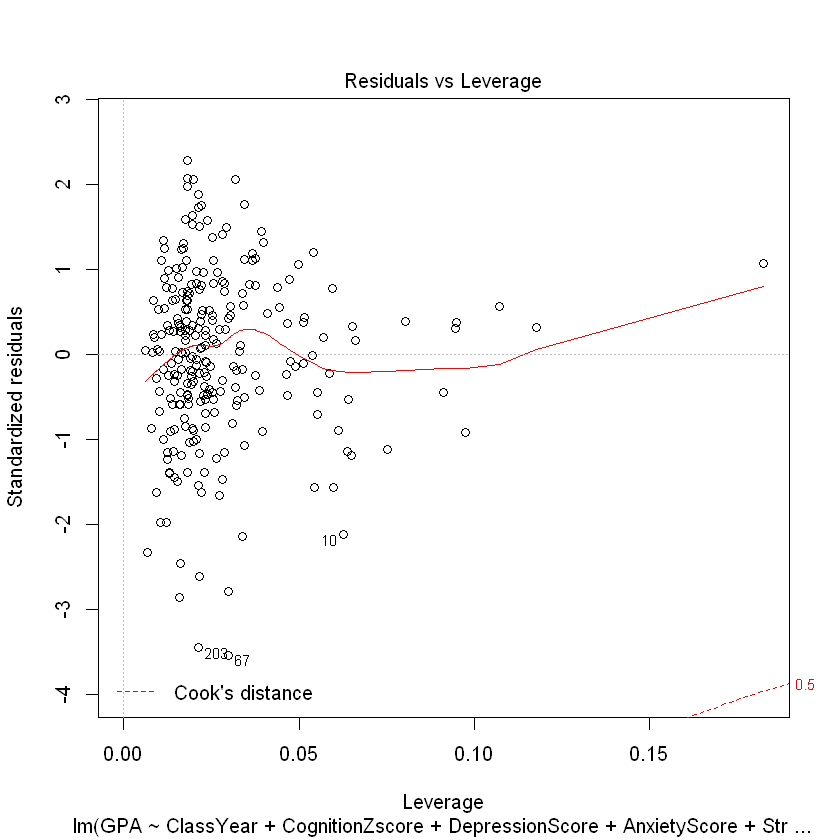

In [4]:
# YOUR CODE HERE
#Now we plot
plot(GPAmod.4)
#stop("Not Implemented")

Comment briefly on the residual analysis.

Our Residuals look pretty good. Our QQ plot looks mostly good, but the tails of my residuals are a little off.
The Residuals vs leverage looks mostly good. The one high leverage point has a rather high residual, but it doesn't look too bad.

---

# Problem 2

The `NutritionStudy` data set within the `Lock5Data` package contains information on the health and nutrition of 315 individuals. The purpose in this problem is to use this data to model `Quetelet`, a variable defined as follows:

$$\text{Quetelet} = \frac{\text{Weight}}{\text{Height}^2}$$

The 19th century Statistician Adolphe Quetelet developed the idea that one's height should be used to determine an ideal weight. This is now recognized as the body mass index (BMI). First, consider the variable `PriorSmoke`, which takes one of three values:

Value | Meaning
----- | --------------
1     | Never smoked
2     | Used to smoke
3     | Still smoke

Since this is an ordered scale, this could be treated as a continuous variable, but could also be treated as a categorical variable (factor). Create a plot to show the fitted line for using the `PriorSmoke` variable to model `Quetelet` as both a continuous variable and a categorical variable. Don't forget to include a title, legend, axis labels, ad context information!

The following object is masked from SleepStudy:

    Gender




Call:
lm(formula = Quetelet ~ as.factor(PriorSmoke), data = NutritionStudy)

Coefficients:
           (Intercept)  as.factor(PriorSmoke)2  as.factor(PriorSmoke)3  
               26.7262                 -0.7985                 -2.0317  



Call:
lm(formula = Quetelet ~ PriorSmoke, data = NutritionStudy)

Coefficients:
(Intercept)   PriorSmoke  
    27.7281      -0.9589  


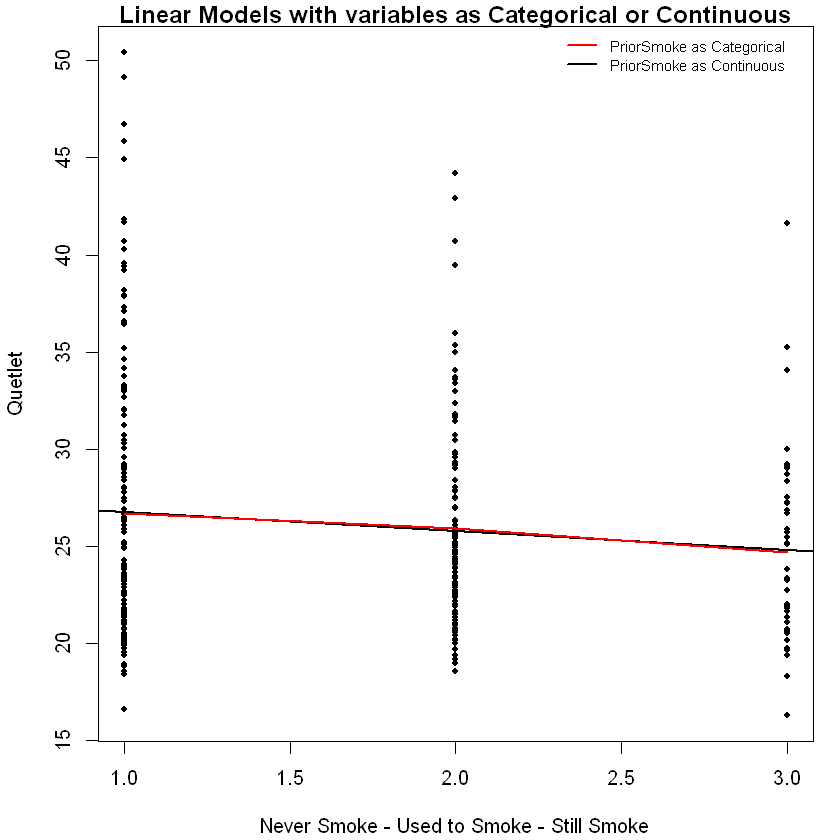

In [5]:
library(Lock5Data)
data("NutritionStudy")

# YOUR CODE HERE
attach(NutritionStudy)

Nut.Que.mod.fac <- lm(Quetelet ~ as.factor(PriorSmoke), data = NutritionStudy)
Nut.Que.mod.fac
Nut.Que.mod.num <- lm(Quetelet ~ PriorSmoke, data = NutritionStudy)
Nut.Que.mod.num
par(mar=c(4,4,1,1)+0.1)
plot(PriorSmoke, Quetelet , main = "Linear Models with variables as Categorical or Continuous", xlab = "Never Smoke - Used to Smoke - Still Smoke", ylab = "Quetlet", pch=20)

fac_lines <- aggregate(Nut.Que.mod.fac$fitted.values ~ PriorSmoke, FUN = mean)

abline(Nut.Que.mod.num$coefficients, col = "black", lw = 2)
lines(fac_lines, col = "red", lw = 2)
legend("topright", c("PriorSmoke as Categorical", "PriorSmoke as Continuous"), 
       col=c("red", "black"), lw = 2 , bty="n", cex = 0.75)
#stop("Not Implemented")

Next, fit a model for `Quetelet` with the following predictors:

- `Cholesterol`
- `PriorSmoke` (either as a continuous or categorical variable, based on your answer above)
- `BetaPlasma`
- `Gender`
- An interaction between `Gender` and `PriorSmoke`

Name the linear model object `first_lm` and include a summary of the model output.

In [6]:
# YOUR CODE HERE
first_lm <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender + Gender*PriorSmoke, 
               data = NutritionStudy)
#stop("Not Implemented")
summary(first_lm)


Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + 
    Gender + Gender * PriorSmoke, data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.554  -4.210  -1.129   3.020  22.333 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           29.197461   1.149597  25.398  < 2e-16 ***
Cholesterol            0.004314   0.002596   1.662  0.09760 .  
PriorSmoke            -1.550624   0.498175  -3.113  0.00203 ** 
BetaPlasma            -0.007945   0.001816  -4.375 1.67e-05 ***
GenderMale            -3.951574   2.756809  -1.433  0.15276    
PriorSmoke:GenderMale  1.976515   1.419836   1.392  0.16490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.785 on 309 degrees of freedom
Multiple R-squared:  0.08924,	Adjusted R-squared:  0.0745 
F-statistic: 6.055 on 5 and 309 DF,  p-value: 2.296e-05


Use backward selection to produce a model with predictors that are all significant at an $\alpha$-level of 0.05. Name the final model `final_lm` and include a summary of the model object.

In [7]:
# YOUR CODE HERE
#Backwards Selection
#removed PriorSmoke*Gender
first_lm.2 <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender, 
               data = NutritionStudy)
summary(first_lm.2)
#removed Gender
first_lm.3 <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma, 
               data = NutritionStudy)
summary(first_lm.3)
#remove Cholesterol
final_lm <- lm(Quetelet ~ PriorSmoke + BetaPlasma, 
                 data = NutritionStudy)
summary(final_lm)
#stop("Not Implemented")


Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + 
    Gender, data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.388  -4.231  -1.253   2.962  22.507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.707532   1.096054  26.192  < 2e-16 ***
Cholesterol  0.004692   0.002586   1.814  0.07060 .  
PriorSmoke  -1.311701   0.468383  -2.800  0.00542 ** 
BetaPlasma  -0.007843   0.001817  -4.315 2.14e-05 ***
GenderMale  -0.373768   0.998721  -0.374  0.70848    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.794 on 310 degrees of freedom
Multiple R-squared:  0.08353,	Adjusted R-squared:  0.0717 
F-statistic: 7.063 on 4 and 310 DF,  p-value: 1.875e-05



Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma, 
    data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.361  -4.205  -1.227   3.029  22.539 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.732821   1.092455  26.301  < 2e-16 ***
Cholesterol  0.004462   0.002508   1.779  0.07626 .  
PriorSmoke  -1.327186   0.465907  -2.849  0.00468 ** 
BetaPlasma  -0.007811   0.001813  -4.309 2.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.786 on 311 degrees of freedom
Multiple R-squared:  0.08311,	Adjusted R-squared:  0.07427 
F-statistic: 9.397 on 3 and 311 DF,  p-value: 5.807e-06



Call:
lm(formula = Quetelet ~ PriorSmoke + BetaPlasma, data = NutritionStudy)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.582  -4.145  -1.059   3.068  22.308 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.745776   0.935509   31.80  < 2e-16 ***
PriorSmoke  -1.241703   0.465026   -2.67  0.00798 ** 
BetaPlasma  -0.008186   0.001807   -4.53 8.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.806 on 312 degrees of freedom
Multiple R-squared:  0.07378,	Adjusted R-squared:  0.06785 
F-statistic: 12.43 on 2 and 312 DF,  p-value: 6.413e-06


---

# Problem 3

Use the American Community Survey (`ACS`) dataset in the `Lock5Data` package to perform an analysis of variance (ANOVA) to compare mean incomes in `Race` and `Sex` groups. Should the model include an interaction term? Begin by making an interaction plot to determine if the effect of being a different race affects the sexes differently. Don't forget to include a title, axis labels, legend, and context information. Some of the preliminary data management has been done for you.

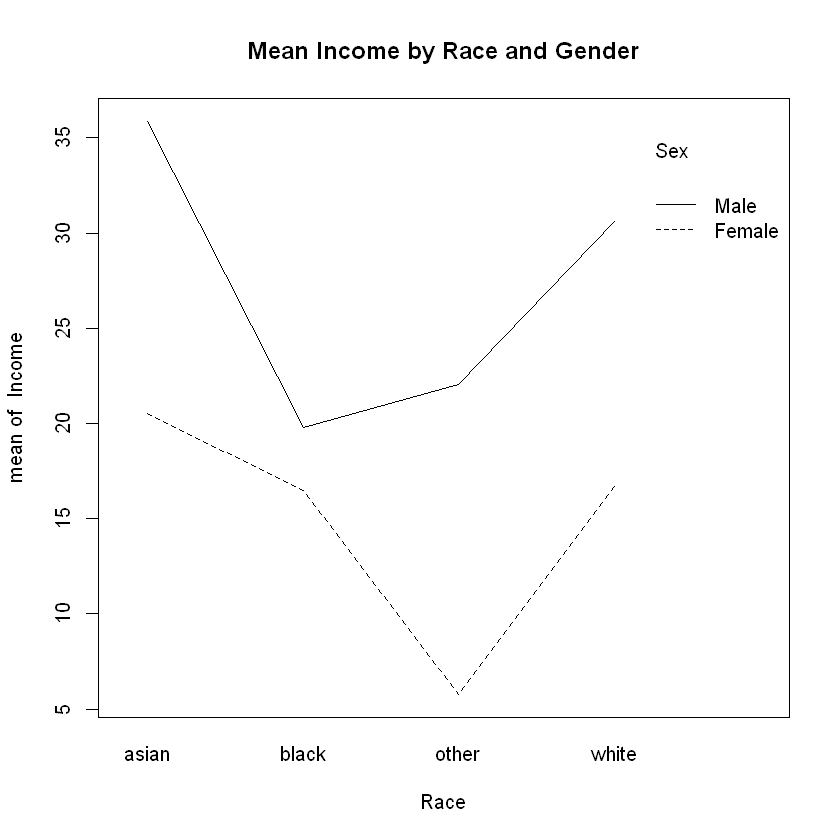

In [8]:
library(Lock5Data)
data("ACS")
ACS$Sex <- factor(ACS$Sex, labels = c("Female","Male"))
sub_acs <- subset(ACS, select = c("Income","Sex","Race"))
sub_acs <- na.omit(sub_acs)

# YOUR CODE HERE
attach(sub_acs)
interaction.plot(Race, Sex, Income, main = "Mean Income by Race and Gender")
#stop("Not Implemented")

Next, perform an ANOVA for `Income` with the `Sex` and `Race` variables. Include the interaction between the two variables in the model as well. If necessary, use backward selection (don't add any more variables) to produce a final model. Name the final model `final_lm` and include a summary of the model object. Use an $\alpha$-level of 0.05 to determine whether variables are statistically significant.

In [9]:
# YOUR CODE HERE
income.mod <- lm(Income ~ Race*Sex, data=sub_acs)

#remove race*sex interaction 
income.mod.2 <- lm(Income ~ Race + Sex, data=sub_acs)

#remove Race
final_lm <- lm(Income ~ Sex, data=sub_acs)
anova(final_lm)

summary(final_lm)
#stop("Not Implemented")

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Sex,1,37028.43,37028.432,20.59264,6.527636e-06
Residuals,823,1479868.62,1798.139,NA,NA



Call:
lm(formula = Income ~ Sex, data = sub_acs)

Residuals:
   Min     1Q Median     3Q    Max 
-29.75 -16.30 -15.30  10.25 533.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.295      1.997   8.161 1.24e-15 ***
SexMale       13.458      2.966   4.538 6.53e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.4 on 823 degrees of freedom
Multiple R-squared:  0.02441,	Adjusted R-squared:  0.02323 
F-statistic: 20.59 on 1 and 823 DF,  p-value: 6.528e-06


Regardless of what your final model was above, conduct pairwise t-tests to see if any pairs of races have significantly different mean incomes. Use the Bonferroni correction on the p-values to adjust for multiple comparisons.

In [10]:
# YOUR CODE HERE
pairwise.t.test(Income, Race, p.adjust.method="bonferroni")

#stop("Not Implemented")


	Pairwise comparisons using t tests with pooled SD 

data:  Income and Race 

      asian black other
black 0.71  -     -    
other 0.36  1.00  -    
white 1.00  1.00  0.95 

P value adjustment method: bonferroni 

Are any significantly different from each other? How does this match up with your ANOVA outcome? Answer breifly in only a sentence or two.

I found no significant differences between Races. This matches with my ANOVA that found Race to not be significant either.